In [1]:
import tensorflow as tf
print(tf.__version__)

2.0.0


# The Sequential model API

 ## Coding tutorials
 #### [1. Building a Sequential model](#coding_tutorial_1)
 #### [2. Convolutional and pooling layers](#coding_tutorial_2)
 #### [3. The compile method](#coding_tutorial_3)
 #### [4. The fit method](#coding_tutorial_4)
 #### [5. The evaluate and predict methods](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Building a Sequential model

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax

#### Build a feedforward neural network model

In [3]:
# Build the Sequential feedforward neural network model

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(16, activation='relu'),
    Dense(16, activation='relu'),
    Dense(16, activation='softmax'),
])

In [4]:
# Print the model summary

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 16)                12560     
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
Total params: 13,104
Trainable params: 13,104
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_2"></a>
## Convolutional and pooling layers

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

#### Build a convolutional neural network model

In [7]:
# Build the Sequential convolutional neural network model

model = Sequential([
    Conv2D(16, (3, 3), activation= 'relu', input_shape=(28,28,1)),
    MaxPooling2D((3,3)),
    Flatten(),
    Dense(10, activation='softmax')
])

In [8]:
# Print the model summary

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                10250     
Total params: 10,410
Trainable params: 10,410
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_3"></a>
## The compile method

#### Compile the model

In [9]:
# Define the model optimizer, loss function and metrics

model.compile(optimizer= 'adam',
             loss= 'sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [10]:
# Print the resulting model attributes

print(model.loss)
print(model.optimizer)
print(model.metrics)

sparse_categorical_crossentropy


***
<a id="coding_tutorial_4"></a>
## The fit method

In [11]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Load the data

In [12]:
# Load the Fashion-MNIST dataset

fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

In [13]:
# Print the shape of the training data

train_images.shape

(60000, 28, 28)

In [14]:
# Define the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

In [15]:
# Rescale the image values so that they lie in between 0 and 1.

train_images = train_images / 255.
test_images = test_images / 255.

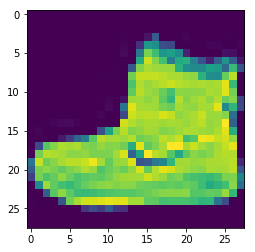

Label : Ankle boot


In [16]:
# Display one of the images

index = 0
img = train_images[index]
plt.imshow(img)
plt.show()
print(f"Label : {labels[train_labels[index]]}")

#### Fit the model

In [19]:
# Fit the model

history = model.fit(train_images[...,np.newaxis], train_labels, epochs=5, batch_size=100)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 50s 836us/sample - loss: 0.3854 - accuracy: 0.8620
Epoch 2/5
60000/60000 [==============================] - 51s 843us/sample - loss: 0.3678 - accuracy: 0.8694
Epoch 3/5
60000/60000 [==============================] - 51s 853us/sample - loss: 0.3541 - accuracy: 0.8749
Epoch 4/5
60000/60000 [==============================] - 51s 842us/sample - loss: 0.3457 - accuracy: 0.8771
Epoch 5/5
60000/60000 [==============================] - 52s 860us/sample - loss: 0.3376 - accuracy: 0.8804


#### Plot training history

In [20]:
# Load the history into a pandas Dataframe

df = pd.DataFrame(history.history)
df.head()

,loss,accuracy
0,0.385431,0.862000
1,0.367847,0.869400
2,0.354135,0.874900
3,0.345677,0.877133
4,0.337563,0.880383


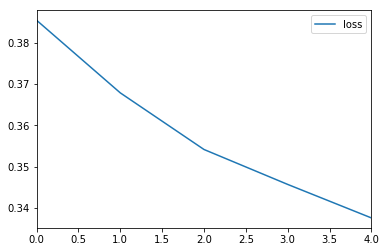

In [21]:
# Make a plot for the loss

loss_plot = df.plot(y='loss')

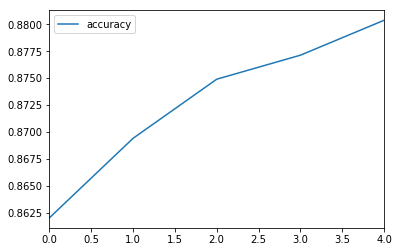

In [23]:
# Make a plot for the accuracy

accuracy_plot = df.plot(y='accuracy')

In [ ]:
# Make a plot for the additional metric



***
<a id="coding_tutorial_5"></a>
## The evaluate and predict methods

In [24]:
import matplotlib.pyplot as plt
import numpy as np

#### Evaluate the model on the test set

In [27]:
# Evaluate the model

test_loss, test_accuracy = model.evaluate(test_images[...,np.newaxis], test_labels, verbose=2)

10000/1 - 4s - loss: 0.2853 - accuracy: 0.8723


#### Make predictions from the model

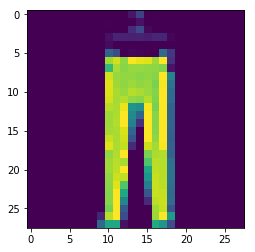

Label: Trouser


In [28]:
# Choose a random test image

random_inx = np.random.choice(test_images.shape[0])

test_image = test_images[random_inx]
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[random_inx]]}")

In [35]:
test_imgs = test_images[:5000]

In [38]:
# Get the model predictions

predictions = model.predict(test_imgs[...,np.newaxis])

Model Predictions : Ankle boot


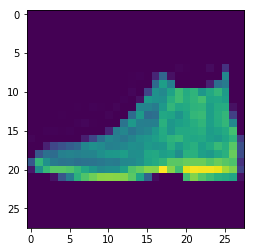

Model Predictions : Pullover


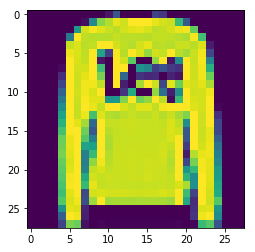

Model Predictions : Trouser


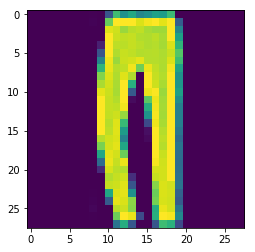

Model Predictions : Trouser


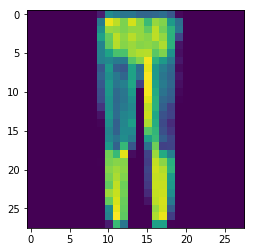

Model Predictions : Shirt


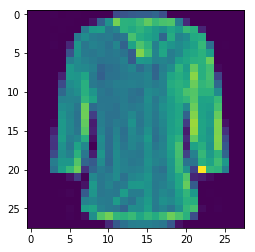

Model Predictions : Trouser


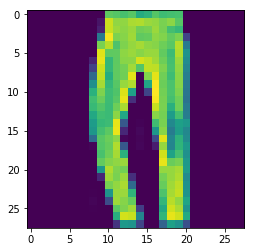

Model Predictions : Coat


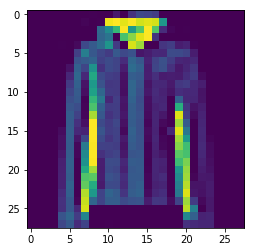

Model Predictions : Shirt


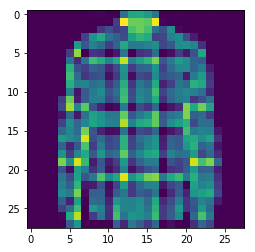

Model Predictions : Sandal


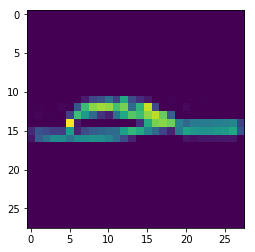

Model Predictions : Sneaker


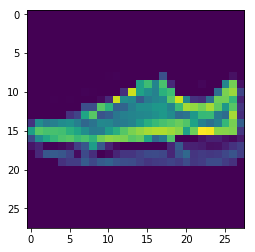

Model Predictions : Coat


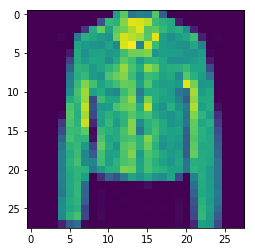

Model Predictions : Sandal


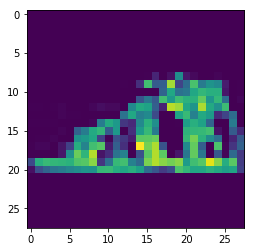

Model Predictions : Bag


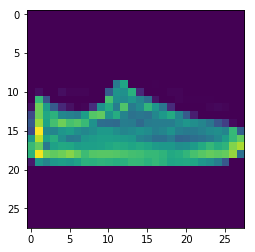

Model Predictions : Dress


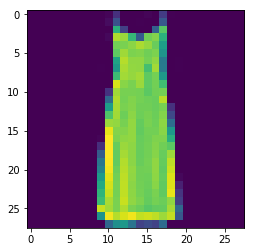

Model Predictions : Coat


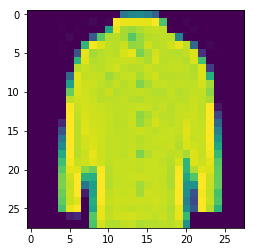

Model Predictions : Trouser


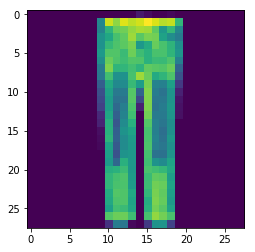

Model Predictions : Pullover


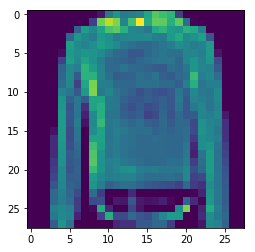

Model Predictions : Coat


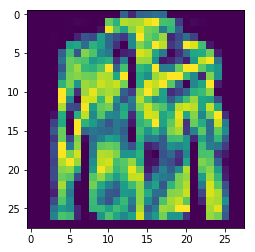

Model Predictions : Bag


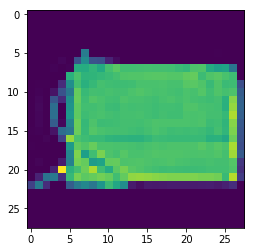

Model Predictions : T-shirt/top


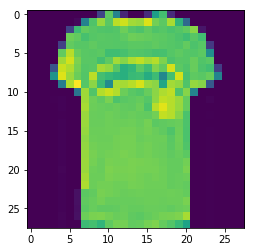

In [44]:
num = 20

for i in range(num):
    val = np.argmax(predictions[i])
    print(f"Model Predictions : {labels[val]}")
    plt.imshow(test_imgs[i])
    plt.show()